In [3]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import nnqs
import sampler
from hamiltonian import Ising1D, TFIH
import optimizer

2025-07-12 17:38:59.932474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752334739.956605  142373 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752334739.963536  142373 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752334739.980837  142373 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752334739.980858  142373 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752334739.980860  142373 computation_placer.cc:177] computation placer alr

In [17]:
L = 32
n_spins = L * L
density = 2
n_hidden_spins = int(L * density)

In [18]:
wave_1 = nnqs.RBM(n_visible=L, n_hidden=n_hidden_spins, std_weights=0.01)
print("a:", wave_1.a.numpy())
print("b:", wave_1.b.numpy())
print("W:", wave_1.W.numpy())
m_sampler_1 = sampler.GibbsSampler(n_visible=L, n_hidden=n_hidden_spins, k=5, batch_size=100)
#print("Initial state:", m_sampler.current_state)

ham = TFIH(L=L, J=1.0, h=0.0)

opt_1 = optimizer.StochasticReconfiguration(
    wave_function=wave_1,
    hamiltonian=ham,
    sampler=m_sampler_1,
    learning_rate=0.01,
    epsilon=0.001,
)

a: [-0.01506302  0.25512347  0.15167573 -0.0459911  -0.02627617  0.00544563
 -0.00865956 -0.11537693  0.01304029 -0.01154306 -0.08022141  0.01105818
 -0.15714552 -0.0836898  -0.06504489 -0.0275012   0.04643032 -0.15755136
 -0.05443667 -0.00642914 -0.10638356 -0.01142374  0.03754674 -0.12223542
 -0.04557772  0.14382865  0.03181771  0.08257455 -0.01289467 -0.04548758
 -0.15963565  0.00853289]
b: [ 0.03698665 -0.0867383   0.00976002  0.09975226  0.02024543 -0.064565
 -0.0576254   0.02662872  0.08139922  0.07999495  0.05969615 -0.02344836
  0.00759127  0.00991059  0.02002415 -0.09848582  0.08888964  0.07921948
 -0.12754296 -0.06055625 -0.01736423 -0.03108075 -0.0278421   0.04428222
 -0.09213497  0.20834208 -0.00784772 -0.04765245  0.04080906  0.19936459
 -0.00578118 -0.07059161  0.11766986 -0.01216963 -0.03594252 -0.05290636
  0.04457038 -0.00385354  0.14933865 -0.12137943 -0.25151017 -0.02935019
 -0.20558046  0.04488806  0.00672828  0.0066845   0.29320586 -0.04350488
  0.00521229  0.16785

In [19]:
print(wave_1.W.shape)
#opt_1.optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, gradient_accumulation_steps=8)


(32, 64)


In [20]:
results_sr = opt_1.train(n_iterations=200)

Iteration 0: Energy = -0.360000, Variance = 34.270401
Iteration 1: Energy = 0.520000, Variance = 26.769600
Iteration 2: Energy = -0.840000, Variance = 35.294399
Iteration 3: Energy = 1.200000, Variance = 27.680000
Iteration 4: Energy = -0.080000, Variance = 39.673599
Iteration 5: Energy = 0.280000, Variance = 30.481600
Iteration 6: Energy = -0.560000, Variance = 31.046402
Iteration 7: Energy = -0.880000, Variance = 26.745600
Iteration 8: Energy = -0.760000, Variance = 36.382401
Iteration 9: Energy = -1.560000, Variance = 28.446400
Iteration 10: Energy = -2.080000, Variance = 35.353600
Iteration 11: Energy = -2.480000, Variance = 32.889599
Iteration 12: Energy = -1.600000, Variance = 38.080002
Iteration 13: Energy = -2.600000, Variance = 26.039997
Iteration 14: Energy = -2.040000, Variance = 30.558399
Iteration 15: Energy = -2.120000, Variance = 32.465603
Iteration 16: Energy = -2.680000, Variance = 26.257601
Iteration 17: Energy = -4.680000, Variance = 30.097603
Iteration 18: Energy = 

In [21]:
# plot the results
import matplotlib.pyplot as plt

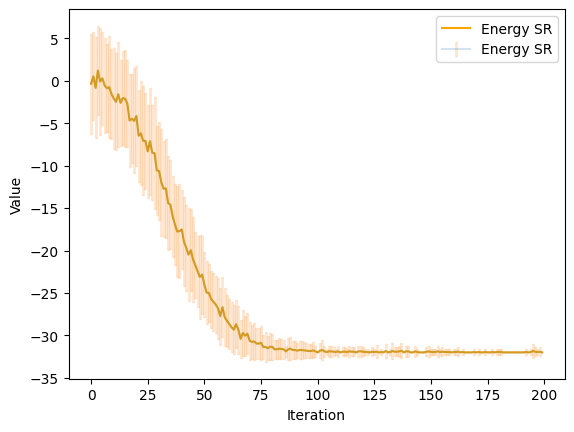

In [22]:
#plt.errorbar(
#    np.arange(len(results_vmc['energies'])),
#    results_vmc['energies'],
#    yerr=np.sqrt(results_vmc['variances']),
#    label='Energy VMC',
#    ecolor='tab:blue',
#    elinewidth=2,
#    alpha=0.2,
#    capsize=1
#)
plt.errorbar(
    np.arange(len(results_sr['energies'])),
    results_sr['energies'],
    yerr=np.sqrt(results_sr['variances']),
    label='Energy SR',
    ecolor='tab:orange',
    elinewidth=2,
    alpha=0.2,
    capsize=1
)
#plt.plot(results_vmc['energies'], label='Energy VMC', color='blue')
plt.plot(results_sr['energies'], label='Energy SR', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

In [27]:
#print(m_sampler.sample(wave)[0])
print(m_sampler_1.sample(wave_1)[0])
#print(m_sampler_1.sample(wave_1))
energies = ham.local_energy(m_sampler_1.current_state, wave_1)
mean = tf.reduce_mean(energies)
variance = tf.math.reduce_variance(energies)
print("Mean energy:", mean.numpy())
print("Variance:", variance.numpy())

tf.Tensor(
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.], shape=(32,), dtype=float32)
Mean energy: -31.96
Variance: 0.1584


In [28]:
ham_2 = Ising1D(L=L, J=1.0, h=0.1)
wave_2 = nnqs.RBM(n_visible=L, n_hidden=n_hidden_spins, std_weights=0.01)
wave_2.W.assign(wave_1.W)
wave_2.a.assign(wave_1.a)
wave_2.b.assign(wave_1.b)
#m_sampler_2 = sampler.MRT2(n_sites=L, n_chains=10, batch_size=100, n_sweeps=5)

opt_2 = optimizer.StochasticReconfiguration(
    wave_function=wave_2,
    hamiltonian=ham_2,
    sampler=m_sampler_1,
    learning_rate=0.01,
    epsilon=0.001,
)
#opt_2.optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

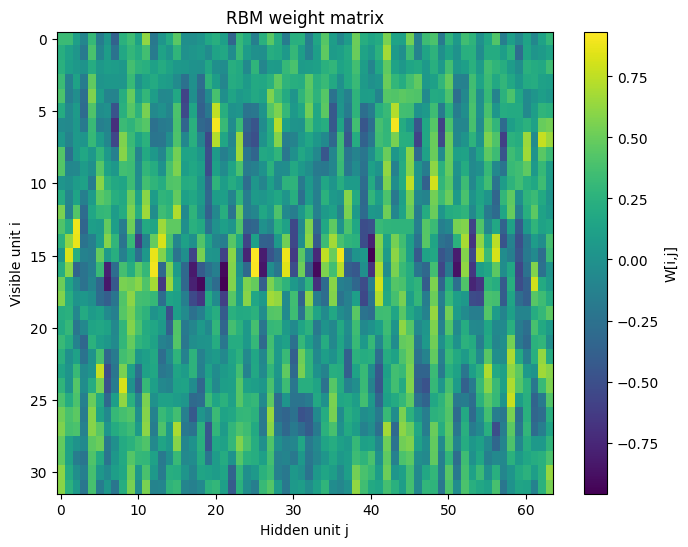

In [31]:
weights = wave_1.W.numpy()
# weights: shape (n_visible, n_hidden)
n_visible, n_hidden = weights.shape

plt.figure(figsize=(8,6))
plt.imshow(weights, aspect="auto", interpolation="nearest")
plt.colorbar(label="W[i,j]")
plt.xlabel("Hidden unit j")
plt.ylabel("Visible unit i")
plt.title("RBM weight matrix")
plt.show()

In [21]:
results_perturbation = opt_2.train(n_iterations=10)

Iteration 0: Energy = -34.714001, Variance = 0.018604
Iteration 1: Energy = -34.709999, Variance = 0.018700
Iteration 2: Energy = -34.680000, Variance = 0.175200
Iteration 3: Energy = -34.739998, Variance = 0.020400
Iteration 4: Energy = -34.716000, Variance = 0.020944
Iteration 5: Energy = -34.765999, Variance = 0.022444
Iteration 6: Energy = -34.736000, Variance = 0.215904
Iteration 7: Energy = -34.767998, Variance = 0.025376
Iteration 8: Energy = -34.755997, Variance = 0.019664
Iteration 9: Energy = -34.790001, Variance = 0.017100


In [22]:
ham_2 = Ising1D(L=L, J=1.0, h=0.0)
#m_sampler_2 = sampler.MRT2(n_sites=L, n_chains=10, batch_size=100, n_sweeps=5)

opt_3 = optimizer.StochasticReconfiguration(
    wave_function=wave_2,
    hamiltonian=ham_2,
    sampler=m_sampler_1,
    learning_rate=0.01,
    epsilon=0.001,
)

In [23]:
result_after = opt_3.train(n_iterations=50)

Iteration 0: Energy = -32.000000, Variance = 0.000000
Iteration 1: Energy = -31.959999, Variance = 0.158400
Iteration 2: Energy = -32.000000, Variance = 0.000000
Iteration 3: Energy = -31.959999, Variance = 0.158400
Iteration 4: Energy = -32.000000, Variance = 0.000000
Iteration 5: Energy = -32.000000, Variance = 0.000000
Iteration 6: Energy = -32.000000, Variance = 0.000000
Iteration 7: Energy = -32.000000, Variance = 0.000000
Iteration 8: Energy = -32.000000, Variance = 0.000000
Iteration 9: Energy = -32.000000, Variance = 0.000000
Iteration 10: Energy = -32.000000, Variance = 0.000000
Iteration 11: Energy = -32.000000, Variance = 0.000000
Iteration 12: Energy = -32.000000, Variance = 0.000000
Iteration 13: Energy = -32.000000, Variance = 0.000000
Iteration 14: Energy = -32.000000, Variance = 0.000000
Iteration 15: Energy = -32.000000, Variance = 0.000000
Iteration 16: Energy = -32.000000, Variance = 0.000000


KeyboardInterrupt: 